In [98]:
from deep_neural_network_model import DNN
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, metrics, model_selection, preprocessing
from tensorflow.keras.datasets import mnist

# IRIS Dataset test

In [99]:
iris = datasets.load_iris()

X = np.array(iris.data[:100])
Y = np.array(iris.target[:100])

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test = X_test.T
Y_test = Y_test.reshape(1,len(Y_test))

In [100]:
print(X_train.shape)
print(X_test.shape)

(4, 80)
(4, 20)


In [101]:
model = DNN()
model.train(X=X_train, Y=Y_train, layer_dims=[5,4,1])

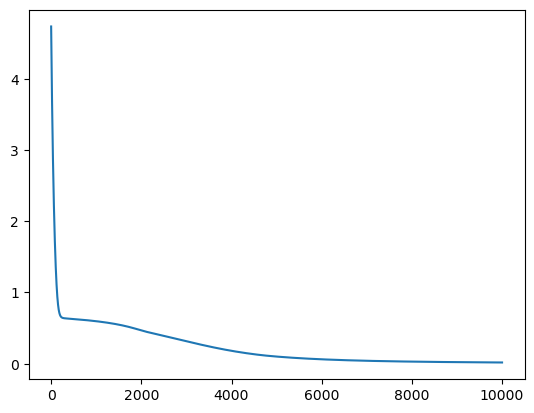

In [102]:
plt.plot(model.cost_during_training)

In [103]:
preds = model.predict(X_test)
pred_labels = preds > 0.5
train_accuracy = np.sum(pred_labels == Y_test) / Y_test.shape[1]
print(train_accuracy)

1.0


# Breast Cancer Data

In [104]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [105]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data For Better Training and also for avoiding Zero Division Errors in the beggining of learning
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

X_train_std = X_train_std.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test_std = X_test_std.T
Y_test = Y_test.reshape(1,len(Y_test))

print(f"{X_train_std.shape} and {Y_train.shape}")
print(f"{X_test_std.shape} and {Y_test.shape}")

(30, 455) and (1, 455)
(30, 114) and (1, 114)


In [106]:
model = DNN()
model.train(X=X_train_std, Y=Y_train, layer_dims=[10, 3, 3, 1], epoch=10_000)

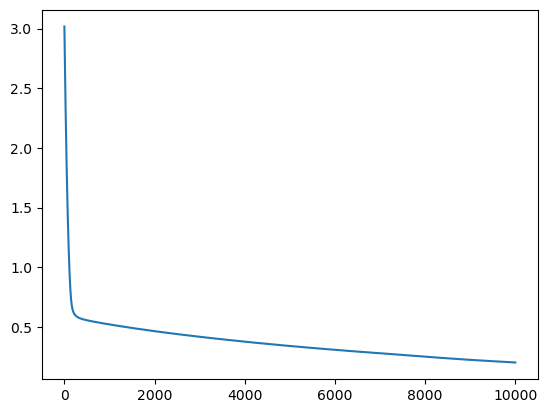

In [107]:
plt.plot(model.cost_during_training)

In [108]:
preds = model.predict(X_test_std)
pred_labels = preds > 0.5
train_accuracy = np.sum(pred_labels == Y_test) / Y_test.shape[1]
print(train_accuracy)

0.9649122807017544


# CIFAR-10 Dataset Test

In [109]:
# load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [110]:
Y_train = np.where(Y_train!=1, 0, 1)
Y_test = np.where(Y_test!=1, 0, 1)

In [111]:
X_train = X_train.reshape(60_000, 28*28)
X_test = X_test.reshape(10_000, 28*28)

In [112]:
# Standardize Pixel values
X_train_std = X_train / 255.0
X_test_std  = X_test / 255.0

In [113]:
X_train_std = X_train_std.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test_std = X_test_std.T
Y_test = Y_test.reshape(1,len(Y_test))

print(f"{X_train_std.shape} and {Y_train.shape}")
print(f"{X_test_std.shape} and {Y_test.shape}")

(784, 60000) and (1, 60000)
(784, 10000) and (1, 10000)


In [114]:
model = DNN()
model.train(X=X_train_std, Y=Y_train, layer_dims=[5, 5, 1], epoch=50)

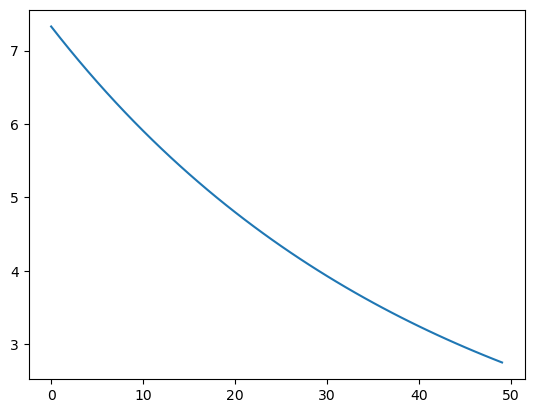

In [115]:
plt.plot(model.cost_during_training)

In [116]:
preds = model.predict(X_test_std)
pred_labels = preds > 0.5
train_accuracy = np.sum(pred_labels == Y_test) / Y_test.shape[1]
print(train_accuracy)

0.1135
